## House Prices: Advanced Regression Techniques : Kaggle Competition

### Import Libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [66]:
df=pd.read_csv('data_cleaned.csv')

In [67]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [68]:
df.shape

(1459, 77)

### Step1: Check for missing values

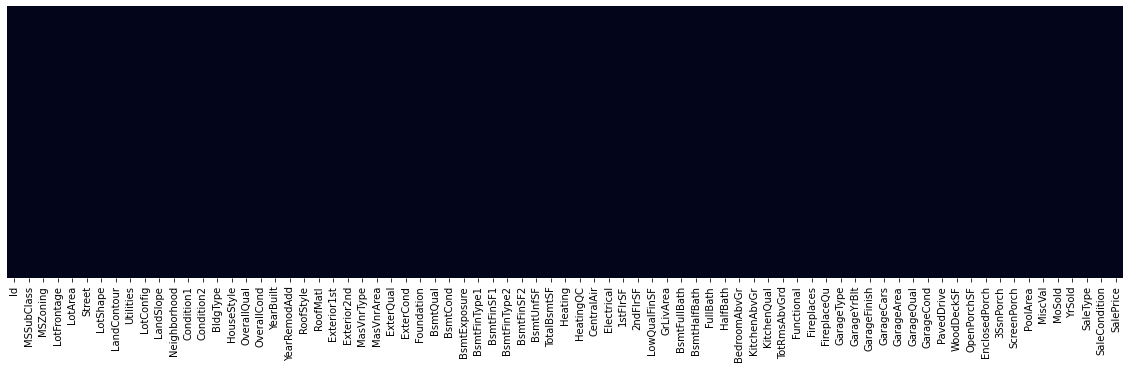

In [69]:
fig, ax = plt.subplots(figsize=(20,5))         # To change fig shape for better representation
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, ax=ax)

In [70]:
def missing_zero_values_table(dataframe):
        zero_val = (dataframe == 0.00).astype(int).sum(axis=0)
        mis_val = dataframe.isnull().sum()
        mis_val_percent = 100 * dataframe.isnull().sum() / len(dataframe)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        zero_val = (dataframe == 0.00).astype(int).sum(axis=0)
        mis_val = dataframe.isnull().sum()
        mis_val_percent = 100 * dataframe.isnull().sum() / len(dataframe)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Data Type'] = dataframe.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(dataframe.shape[1]) + " columns and " + str(dataframe.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

In [71]:
missing_zero_values_table(df)

Your selected dataframe has 77 columns and 1459 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Data Type


In [72]:
df.shape

(1459, 77)

In [73]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df.iloc[:,1:76]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range

In [74]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


In [75]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [76]:
##HAndle Categorical Features
columns = list(X.select_dtypes(include=['object']).columns)
columns

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [77]:
# function to apply get_dummies to all categorical data which will convert categorical variable into 
# dummy/indicator variables 
def category_onehot_multcols(multcolumns):
    df_final=X
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(X[fields],drop_first=True)
        
        X.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([X,df_final],axis=1)
        
    return df_final

In [78]:
X=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [79]:
X.shape

(1459, 236)

In [81]:
X =X.loc[:,~X.columns.duplicated()] 

In [82]:
X.shape

(1459, 176)

In [83]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [84]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [85]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [86]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)


In [87]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [88]:
featureScores

,Specs,Score
0,MSSubClass,1.929157e+04
1,LotFrontage,5.066724e+03
2,LotArea,1.011442e+07
3,OverallQual,3.779420e+02
4,OverallCond,1.551773e+02
...,...,...
171,AdjLand,4.215417e+02
172,Alloca,1.365944e+03
173,Family,3.866656e+02
174,Normal,1.524702e+02


In [89]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

           Specs         Score
2        LotArea  1.011442e+07
33       MiscVal  6.249006e+06
13      2ndFlrSF  4.649813e+05
8     BsmtFinSF1  3.994498e+05
32      PoolArea  3.832987e+05
9     BsmtFinSF2  3.685835e+05
7     MasVnrArea  2.856108e+05
10     BsmtUnfSF  2.747139e+05
14  LowQualFinSF  2.447074e+05
15     GrLivArea  1.968564e+05


In [90]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [91]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers


[1.51943195e-02 2.57185946e-02 2.74743378e-02 2.02571045e-02
 1.51272558e-02 2.50709883e-02 2.55417327e-02 1.69319277e-02
 2.30309784e-02 8.40605728e-03 2.67002308e-02 2.67757730e-02
 2.64192027e-02 1.78530481e-02 1.64322657e-03 3.05862842e-02
 1.20752587e-02 4.30984396e-03 7.52033801e-03 9.99208167e-03
 1.66631816e-02 2.35425629e-03 2.31023456e-02 1.58295030e-02
 2.76326758e-02 1.39617198e-02 2.64905145e-02 2.14463866e-02
 2.08905706e-02 8.45986361e-03 2.02545051e-03 7.09894917e-03
 1.37611845e-04 2.78871614e-03 2.72032428e-02 2.61063601e-02
 1.98177700e-03 9.58294015e-04 5.81454850e-03 4.25830140e-03
 2.78059099e-04 2.54255825e-03 8.47337603e-04 1.27060417e-02
 2.07970498e-03 1.28998208e-03 5.26539701e-03 0.00000000e+00
 4.67673585e-03 2.70402625e-03 6.43439627e-04 1.27687057e-02
 2.84067878e-03 6.66434506e-04 7.20823950e-05 5.22364022e-04
 2.56145505e-03 1.47035281e-03 5.02765880e-03 2.63165361e-03
 4.21493873e-03 3.25860944e-03 1.88924816e-03 4.15616550e-04
 2.44109897e-03 5.696173

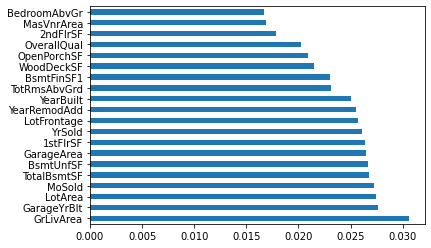

In [102]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()